# FINAL PROJECT

**COMMENTS**
* 70/70
* Overall, this is an excellent piece of work. Very thoughtful and thorough.
* My one criticism, which is a big one, is that you submitted a notebook that doesn't run because you didn't define a variable. (I fixed this in this version, but your original should still have the problem.) I took off 5 points for this.
* You get 5 extra points because you used LaTex. So, you ended up with full credit for the project.

In the final project, you will create a closed loop system for an SBML model.
Start by selecting a model from the [BioModels Curated branch](https://www.ebi.ac.uk/biomodels/search?query=*%3A*+AND+curationstatus%3A%22Manually+curated%22&domain=biomodels).)
You don't have to restrict yourself to thoses models, but you'll find that the curated BioModels are fairly easy to reproduce.) You'll find a paper associated with each model.

1. **Specify the requirements for the control system.** (10 pt) After reading the paper for the model, propose a chemical species for the control output
and an operating point for it. You should also indicate the desired
operating characteristics such as settling time and overshoot.
Justify this in terms of the potential value of controlling
the chemical species and why the particular operating point makes sense.
1. **Determine the control input you will use**. (10 pt) This will require evaluating the DC gain of
of candidate control inputs on chemical species that are the control outputs.
1. **Design the control system**. (15 pt) You will specify a controller and possibly a filter.
You will select the parameters of the elements based on the poles and DC gains implied by
the operating characteristics in (1).
1. **Evaluate your design.** (25 pt) You will construct a simulation testbed in which the
SBML model is regulated by your control architecture.
You should evaluate the effects of disturbances and noise.
1. **Discuss trade-offs.** (10 pt) Discuss trade-offs in the selection of parameter values in your design.
This should consider the impact of parameter values on the closed loop transfer functions.

You will receive 5 extra points if you use LaTex for your mathematical analyses.

**All students will present their projects during the last week of class.**
This is an ungraded presentation intended to give you early feedback on your work.

# Preliminaries

In [1]:
# !pip install -q controlSBML
# import control
# import controlSBML as ctl
# import pandas as pd
# import matplotlib.pyplot as plt
# import numpy as np
# import tellurium as te

!pip install -q control
!pip install -q tellurium
!pip install -q controlSBML

import control
import controlSBML as ctl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tellurium as te

     |████████████████████████████████| 398 kB 7.2 MB/s 
     |████████████████████████████████| 121 kB 7.8 MB/s 
     |████████████████████████████████| 2.6 MB 60.6 MB/s 
     |████████████████████████████████| 5.6 MB 38.2 MB/s 
     |████████████████████████████████| 5.0 MB 33.4 MB/s 
     |████████████████████████████████| 2.1 MB 38.6 MB/s 
     |████████████████████████████████| 3.3 MB 43.1 MB/s 
     |████████████████████████████████| 38.1 MB 1.3 MB/s 
     |████████████████████████████████| 54.8 MB 1.2 MB/s 
     |████████████████████████████████| 36.7 MB 95 kB/s 
     |████████████████████████████████| 3.2 MB 47.8 MB/s 
     |████████████████████████████████| 6.8 MB 25.6 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.
     |████████████████████████

# Helpful Hints

## LaTex Basics

1. All LaTex appears between dollar signs (``$``)
1. Subscripts: $x_2$
1. Superscript: $x^2$
1. Summation: $\sum_{n=0}^{\infty} e^{nt}$
1. Derivatives: $\dot{x}(t)$
1. Bold: ${\bf A}$
1. Fractions: $\frac{a}{b}$

Questions:

Where can I input the Jacobian value I want to use into the function evaluateClosedLoopSystem?

Why do my inputs not change my outputs when the transfer function analysis shows there is a nonzero relationship between them?

## Closed Loop Transfer Functions

<img src="https://github.com/joseph-hellerstein/advanced-controls-lectures/blob/main/Lecture_13_14-Closed-Loop-Systems/Closed-Loop-System.png?raw=true"
     alt="Markdown Monster icon" width=600pt
     style="float: left; margin-right: 10px;" />

**Transfer Functions**
\begin{eqnarray}
H_{RY}(s) & = & \frac{Y(s)}{R(s)} & = & \frac{C(s) G(s)}{1 + C(s) G(s) F(s)} \\
H_{RE}(s) & = & \frac{E(s)}{R(s)} & = & \frac{1}{1 + C(s) G(s) F(s)} \\
H_{NY}(s) & = & \frac{Y(s)}{N(s)} & = & -\frac{ F(s)}{1 + C(s) G(s) F(s)} \\
H_{DY}(s) & = & \frac{Y(s)}{D(s)} & = & \frac{ C(s)}{1 + C(s) G(s) F(s)} \\
\end{eqnarray}

# Constants

In [2]:
TIMES = ctl.makeSimulationTimes(0, 5, 500)

In [3]:
BIOMD = "https://www.ebi.ac.uk/biomodels/model/download/BIOMD0000000502.2?filename=BIOMD0000000502_url.xml"

# Antimony Model

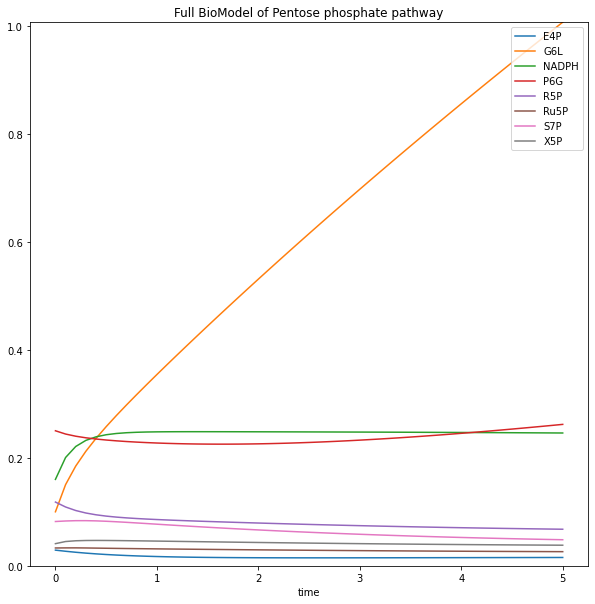

In [4]:
ctlsb = ctl.ControlSBML(BIOMD, input_names = ["Ru5P"], output_names = ["X5P"])
ctlsb.plotTrueModel(title = "Full BioModel of Pentose phosphate pathway")

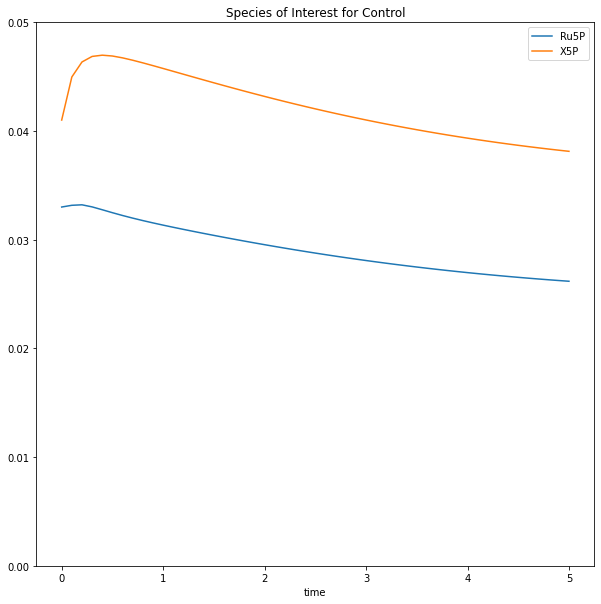

In [5]:
# Plot of species of interest
ctlsb.plotTrueModel(names = ["Ru5P", "X5P"], ylim = [0,.05], title = "Species of Interest for Control")

In [6]:
# See antimony information to determine 
print(ctlsb.antimony)

// Created by libAntimony v2.13.1
model *MODEL1311290000()

  // Compartments and Species:
  compartment cell;
  species E4P in cell, G6L in cell, NADPH in cell, P6G in cell, R5P in cell;
  species Ru5P in cell, S7P in cell, X5P in cell, $NADP in cell, $G6P in cell;
  species $F6P in cell, $GAP in cell, $GND1 in cell, $GND2 in cell, $NQM1 in cell;
  species $RKI1 in cell, $RPE1 in cell, $SOL3 in cell, $TAL1 in cell, $TKL1 in cell;
  species $ZWF1 in cell;

  // Assignment Rules:
  NADP := sum_NADP - NADPH;
  G6P := 0.9 + piecewise(44.1*time/(48 + time + 0.45*time^2), time >= 0, 0);

  // Reactions:
  GND: P6G + $NADP => Ru5P + NADPH; cell*(GND1*GND_kcat_GND1*P6G*NADP/(GND_Kp6g_GND1*GND_Knadp_GND1)/((1 + P6G/GND_Kp6g_GND1 + Ru5P/GND_Kru5p_GND1)*(1 + NADP/GND_Knadp_GND1 + NADPH/GND_Knadph_GND1)) + GND2*GND_kcat_GND2*P6G*NADP/((1 + P6G/GND_Kp6g_GND2 + Ru5P/GND_Kru5p_GND2)*(1 + NADP/GND_Knadp_GND2 + NADPH/GND_Knadph_GND2)));
  RKI: Ru5P -> R5P; cell*RKI1*RKI_kcat*(Ru5P - R5P/RKI_Keq)/RKI_K

# 1. Specify Requirements

**Specify the requirements for the control system. (10 pt) After reading the paper for the model, propose a chemical species for the control output and an operating point for it. You should also indicate the desired operating characteristics such as settling time and overshoot. Justify this in terms of the potential value of controlling the chemical species and why the particular operating point makes sense.**


**Discussion**


The control system being analyzed is the Pentose Phosphate Pathway in yeast cells after a pulse of glucose. This pathway has two main branches: oxidative and nonoxidative. The oxidative branch ultimately converts Glucose-6-phosphate (G6P) into Ribulose-5-phosphate (Ru5P), creating NADPH in the process. Then, continuing into the non-oxidative branch, Ribulose-5-phosphate has two ways it can go. It can either be converted to Ribose-5-phosphate which leads to synthesis of pyrimidines and purines. Or, it can be converted to Xylulose-5-phosphate (X5P) which leads to the production of Fructose-6-phosphate (F6P), and this becomes an input into Glycolysis. 


It would be interesting to choose X5P as the control output because this would allow us to see how much control is necessary to push the Pentose Phosphate Pathway to make a certain amount of product for Glycolysis.


The **operating point** for X5P could be reasonably set to .1 mmol for this system. This particular operating point makes sense after comparing the species initialization values of the antimony model. G6P was initially set to 0.1 mmol, X5P was set to .041 mmol, and F6P was set to 0.325 mmol. It is clear that some of the mass from G6P will be converted to X5P, so this value will rise over time in the presence of constant glucose supply, so a higher operating point than .041 mmol makes sense. However, F6P was initially set to a value more than 3 times greater than G6P's starting value (.325 mmol), which may indicate that conversion of X5P to Fructose is amplified, but this was not obvious by the stoichiometry shown for this particular model, nor did the paper go into much more detail. Nonetheless, keeping the operating point lower will avoid too much production of fructose and possible saturation in the system. It will also avoid too much production of purines and pyrimidines which will continue to be made in the adjacent conversion branch from Ru5P without direct observation by the controller. So we just need to see that we can keep a steady supply of X5P without being too excessive.

The **settling times** for most of the species, aside from G6L, look like they settle after about 1 second. However, looking more closely at Ru5p and X5P, these species don't start leveling out until ~5 seconds. Therefore, it would be appropriate for my system to settle before 5 seconds as well. 

As for **overshoot**, I do not want my concentration of X5P to exceed .350 mmol as this would exceed the initial concentration of fructose (.325 mmol) and would be more than 3x higher than my desired control concentration. Too much overshoot could lead to too much fructose production. However, this concern is subjective since there is not enough information about the system to say whether too much fructose production could be damaging to yeast.

**COMMENTS**
* Nicely described.

# 2. Determine the Control Input

**Determine the control input you will use. (10 pt) This will require evaluating the DC gain of of candidate control inputs on chemical species that are the control outputs.**

Looking at candidate control inputs, the three main species that come before the control output of X5P in the reaction pathway are G6L, P6G, and Ru5P. Below is an analysis of the DC gain for each of these species as inputs in relation to X5P as an output, evaluated at different operating times between 0 and 10.  

In [7]:
from os import times
# Controllability of G6L
SISO = ctl.SISOClosedLoopSystem(ctlsb)
dct = SISO.evaluateControllability(range(10), input_names = ["G6L"], output_names = ["X5P"])
for times in dct.keys():
    print("\n%.2f" % times)
    print(dct[times])


0.00
          X5P
G6L  0.045121

1.00
          X5P
G6L  0.045121

2.00
          X5P
G6L  0.016823

3.00
          X5P
G6L  0.013048

4.00
          X5P
G6L  0.010522

5.00
          X5P
G6L  0.008743

6.00
          X5P
G6L  0.007444

7.00
          X5P
G6L  0.006467

8.00
          X5P
G6L  0.005716

9.00
          X5P
G6L  0.005127


In [8]:
# Controllability of P6G
dct = SISO.evaluateControllability(range(10), input_names = ["P6G"], output_names = ["X5P"])
for times in dct.keys():
    print("\n%.2f" % times)
    print(dct[times])


0.00
          X5P
P6G  0.026332

1.00
          X5P
P6G  0.026332

2.00
          X5P
P6G  0.017439

3.00
          X5P
P6G  0.016789

4.00
          X5P
P6G  0.015662

5.00
          X5P
P6G  0.014398

6.00
          X5P
P6G  0.013174

7.00
          X5P
P6G  0.012068

8.00
          X5P
P6G  0.011101

9.00
         X5P
P6G  0.01027


In [9]:
# Controllability of Ru5P
dct = SISO.evaluateControllability(range(10), input_names = ["Ru5P"], output_names = ["X5P"])
for times in dct.keys():
    print("\n%.2f" % times)
    print(dct[times])


0.00
           X5P
Ru5P  1.362933

1.00
           X5P
Ru5P  1.362933

2.00
           X5P
Ru5P  1.368422

3.00
           X5P
Ru5P  1.367487

4.00
           X5P
Ru5P  1.366616

5.00
           X5P
Ru5P  1.365915

6.00
           X5P
Ru5P  1.365402

7.00
           X5P
Ru5P  1.365062

8.00
          X5P
Ru5P  1.36487

9.00
           X5P
Ru5P  1.364799


**Discussion**

After this analysis, we can see that the DC gain between the Ru5P input and X5P output is around 1.365, and this remains roughly constant for multiple times at which the DC gain is evaluated. The DC gain is positive and above 1, so there is a bit of amplification whereas the other species cause attenuation.

Therefore, Ru5P is an adequate input for this system. Realistically, this wouldn't be the easiest species to control in the reaction network since its a conversion species from Glucose-6-phosphate originally, but it provides good controllability for this exercise and the code is able to run quickly. 

Last, I created the transfer function for the system, making sure the calculation did not go to infinity and that it made sense. 

In [10]:
# Checking the transfer function of the system
ss = ctlsb.makeStateSpace()
total = np.sum(ss.A.flatten())
if np.isnan(total):
    tf = control.TransferFunction([0], [1])
else:
    tf = control.ss2tf(ss)
# Printing the transfer function
Gs = tf
tf

TransferFunction(array([ 20.01768936, 194.42911675, 655.01930681, 932.3084697 ,
       517.36586675,  57.17158146,   1.59566978]), array([  1.        ,  27.02691128, 198.20175777, 587.93102992,
       762.18020337, 388.001211  ,  42.11777524,   1.16820554]))

This was a nice transfer function that did not have too high of an order. 

**COMMENTS**
* Very thorough analysis. Well done.

# 3. Design the Control System

**Design the control system. (15 pt) You will specify a controller and possibly a filter. You will select the parameters of the elements based on the poles and DC gains implied by the operating characteristics in (1).**


For this model system, I chose to explore PID control, and incorporate a filter to mitigate the effects of noise. 

In [11]:
def evaluateClosedLoopSystem(ctlsb, is_plot=True, cl_opts={}, plt_opts={}, sim_opts={},
                method=ctl.SISOClosedLoopSystem.makePIDClosedLoopSystem):
    """
    Evaluate a PID controller by plotting step response.
    
    Parameters
    ----------
    cl_opts: dict
        Options for the closed loop system. See parameters for SISOClosedLoopSystem.makePIDClosedLoopSystem
    plt_opts: dict
        Options for plotting. See ctl.plotOneTS
    sim_opts: dict
        Options for simulation
            start_time: float
            end_time: float
            points_per_time: int
    """
    siso = ctl.SISOClosedLoopSystem(ctlsb)
    # Handle the method to call
    extracted_method = method.__qualname__.split(".")[1]
    stmt = "siso.%s(**cl_opts)" % extracted_method
    eval(stmt)
    ts = siso.makeStepResponse(step_size = .1, **sim_opts)
    titles = ["%s=%s" % (k, v) for k, v in cl_opts.items()]
    title = ", ".join(titles)
    if is_plot:
        ctl.plotOneTS(ts, title=title, **plt_opts, figsize = (6,6), ylabel = "Concentration (mmol)")
    return ts

# Tests
cl_opts=dict(kp=0, ki=0, kd=0, kf=-0.000, noise_amp=0.0, noise_frq=0)
sim_opts = dict(end_time= 30)
ctlsb = ctl.ControlSBML(BIOMD, input_names = ["Ru5P"], output_names = ["X5P"])
ts = evaluateClosedLoopSystem(ctlsb, cl_opts=cl_opts, sim_opts=sim_opts, 
                              is_plot=False)
assert("Timeseries" in str(type(ts)))
print("OK!")

OK!


In [13]:
operating_time = 0 # Joe added this line so that code will run.
def checkTFpoles(model, kp, ki, kd):
    """ 
    Checks the poles of the system closed loop transfer function resulting from
    changing PID constants. Assumes filter transfer function is 1.

    Parameters
    ----------
    model: ctl.ControlSBML object
    kp: float
    ki: float
    kd: float

    Results
    -------
    poles: array - float
    """
    Gs = ctlsb.makeTransferFunction(time = operating_time)
    Cs = control.TransferFunction([kp],[1]) + control.TransferFunction([ki], [1,0]) + control.TransferFunction([kd,0],[1])

    HRY = (Gs*Cs) / (1 + Gs*Cs)
    return HRY.poles()

# Test
poles = checkTFpoles(ctlsb, 1, 1, 1)
assert(len(poles) > 0)
print("OK!")

OK!


**COMMENTS**
* ``operating_time`` is undefined in your original; I added a line so that the code runs. My guess is that it was defined at one point in your notebook, and then it was deleted. It seems that you didn't run the notebook before you submitted it? This should never happen. I subtracted 5 pts.

**I looked at the poles of the starting transfer function to get a good idea of what I would need to address with my controller.**

In [14]:
# Poles of transfer function
tf.poles()

array([-17.46856196+0.j,  -4.38103376+0.j,  -2.5408581 +0.j,
        -1.48504021+0.j,  -1.01733742+0.j,  -0.08979607+0.j,
        -0.04428377+0.j])

**The poles were all negative with no imaginary components. So the system would be stable without oscillations from the start.**

**From here, I started with proportional control.**

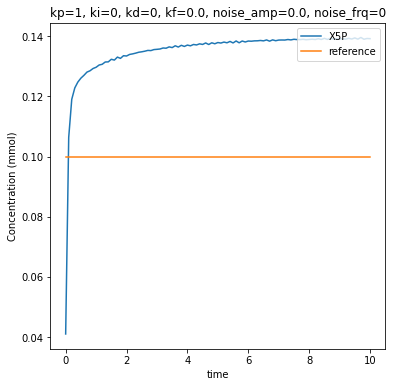

array([-38.35589068+0.00000000e+00j, -18.52298338+0.00000000e+00j,
        -8.95300732+7.65518943e-07j,  -8.95300732-7.65518943e-07j,
        -3.93923063+0.00000000e+00j,  -3.91935672+0.00000000e+00j,
        -1.42696077+0.00000000e+00j,  -1.42514119+0.00000000e+00j,
        -0.99265458+0.00000000e+00j,  -0.87542422+0.00000000e+00j,
        -0.45830544+2.57868264e-07j,  -0.45830544-2.57868264e-07j,
        -0.07986328+0.00000000e+00j,  -0.07986327+0.00000000e+00j])

In [15]:
#Testing first controller iteration - just proportional control
kp = 1
ki = 0
kd = 0
cl_opts=dict(kp = kp, ki = ki, kd = kd, kf=.00, noise_amp=.0, noise_frq=0)
sim_opts = dict(end_time=10)
ts = evaluateClosedLoopSystem(ctlsb, cl_opts=cl_opts, sim_opts=sim_opts, 
                              is_plot=True)
poles = checkTFpoles(ctlsb, kp,ki,kd)
poles

**The system showed overshoot and some oscillations from imaginary components in the poles, so I backed down the proportional controller.**

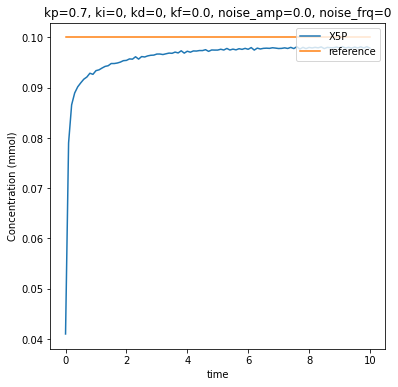

array([-32.38732522+0.j, -18.52298338+0.j,  -8.95300995+0.j,
        -8.9530047 +0.j,  -3.93607158+0.j,  -3.91935672+0.j,
        -1.42659684+0.j,  -1.42514118+0.j,  -0.97319368+0.j,
        -0.87542422+0.j,  -0.4583057 +0.j,  -0.45830518+0.j,
        -0.07986326+0.j,  -0.07986328+0.j])

In [16]:
# Reduced proportional control
kp = .7
ki = 0
kd = 0
cl_opts=dict(kp = kp, ki = ki, kd = kd, kf=.00, noise_amp=.0, noise_frq=0)
sim_opts = dict(end_time=10)
ts = evaluateClosedLoopSystem(ctlsb, cl_opts=cl_opts, sim_opts=sim_opts, 
                              is_plot=True)
poles = checkTFpoles(ctlsb, kp,ki,kd)
poles

**Pretty close, but wanted faster settling time and to be sure that the final control value of .1 mmol was surely being approached.**

**First, I tried integral control to encourage approach.**

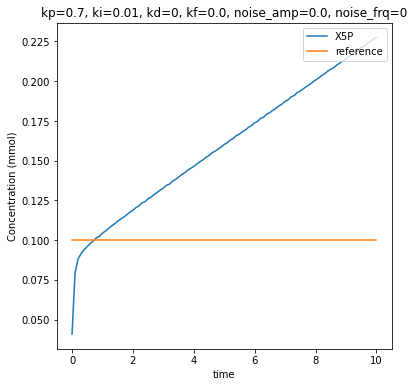

array([-3.23811857e+01+0.00000000e+00j, -1.85229834e+01+0.00000000e+00j,
       -8.95300844e+00+0.00000000e+00j, -8.95300621e+00+0.00000000e+00j,
       -3.93603937e+00+0.00000000e+00j, -3.91935672e+00+0.00000000e+00j,
       -1.42658709e+00+0.00000000e+00j, -1.42514118e+00+0.00000000e+00j,
       -9.72393060e-01+0.00000000e+00j, -8.75424224e-01+0.00000000e+00j,
       -4.58305442e-01+1.69916188e-07j, -4.58305442e-01-1.69916188e-07j,
       -7.98632640e-02+0.00000000e+00j, -7.98632815e-02+0.00000000e+00j,
       -6.98207485e-03+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j])

In [17]:
# Small integral control added
kp = .7
ki = .01
kd = 0
cl_opts=dict(kp = kp, ki = ki, kd = kd, kf=.00, noise_amp=.0, noise_frq=0)
sim_opts = dict(end_time=10)
ts = evaluateClosedLoopSystem(ctlsb, cl_opts=cl_opts, sim_opts=sim_opts, 
                              is_plot=True)
poles = checkTFpoles(ctlsb, kp,ki,kd)
poles

**This was way too much windup. So I reduced integral even further.**

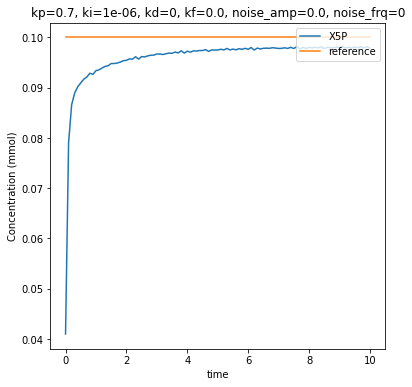

array([-3.23873246e+01+0.00000000e+00j, -1.85229834e+01+0.00000000e+00j,
       -8.95300732e+00+3.39061195e-06j, -8.95300732e+00-3.39061195e-06j,
       -3.93607157e+00+0.00000000e+00j, -3.91935672e+00+0.00000000e+00j,
       -1.42659684e+00+0.00000000e+00j, -1.42514118e+00+0.00000000e+00j,
       -9.73193599e-01+0.00000000e+00j, -8.75424224e-01+0.00000000e+00j,
       -4.58305756e-01+0.00000000e+00j, -4.58305127e-01+0.00000000e+00j,
       -7.98632668e-02+0.00000000e+00j, -7.98632787e-02+0.00000000e+00j,
       -6.97490440e-07+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j])

In [19]:
# Even smaller integral control
kp = .7
ki = .000001
kd = 0
cl_opts=dict(kp = kp, ki = ki, kd = kd, kf=.00, noise_amp=.0, noise_frq=0)
sim_opts = dict(end_time=10)
ts = evaluateClosedLoopSystem(ctlsb, cl_opts=cl_opts, sim_opts=sim_opts, 
                              is_plot=True)
poles = checkTFpoles(ctlsb, kp,ki,kd)
poles

**Still some imaginary component in the poles and not much effect. So I went back to 0 for integral control and switched to adding derivative control instead.**

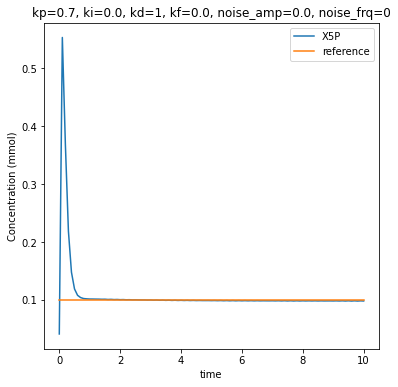

array([-18.52298338+0.00000000e+00j,  -8.95300893+0.00000000e+00j,
        -8.95300572+0.00000000e+00j,  -3.96612987+0.00000000e+00j,
        -3.91935672+0.00000000e+00j,  -1.79329118+0.00000000e+00j,
        -1.42514118+0.00000000e+00j,  -1.42056279+0.00000000e+00j,
        -0.87542422+0.00000000e+00j,  -0.8352646 +0.00000000e+00j,
        -0.45830544+2.76884383e-07j,  -0.45830544-2.76884383e-07j,
        -0.07986327+0.00000000e+00j,  -0.07986328+0.00000000e+00j])

In [20]:
# Adding the derivative control
kp = .7
ki = .00000
kd = 1
cl_opts=dict(kp = kp, ki = ki, kd = kd, kf=.00, noise_amp=.0, noise_frq=0)
sim_opts = dict(end_time=10)
ts = evaluateClosedLoopSystem(ctlsb, cl_opts=cl_opts, sim_opts=sim_opts, 
                              is_plot=True)
poles = checkTFpoles(ctlsb, kp,ki,kd)
poles

**Lots of initial overshoot but good settling to the set point. This was above my objective of keeping overshoot below .350 mmol. So I backed off on derivative control.**

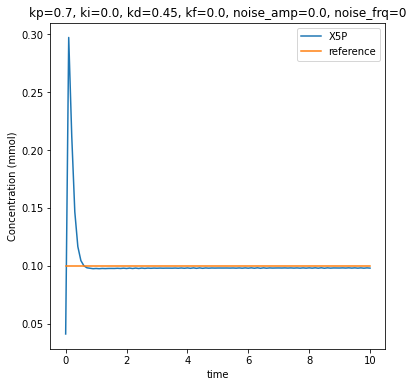

array([-18.52298338+0.00000000e+00j,  -8.95300732+7.55738742e-07j,
        -8.95300732-7.55738742e-07j,  -4.03726155+0.00000000e+00j,
        -3.91935672+0.00000000e+00j,  -3.31467723+0.00000000e+00j,
        -1.4253166 +0.00000000e+00j,  -1.42514112+0.00000000e+00j,
        -0.92907337+0.00000000e+00j,  -0.87542422+0.00000000e+00j,
        -0.45830583+0.00000000e+00j,  -0.45830506+0.00000000e+00j,
        -0.07986327+6.35252538e-09j,  -0.07986327-6.35252538e-09j])

In [21]:
# Smaller derivative control
kp = .7
ki = .00000
kd = .45
cl_opts=dict(kp = kp, ki = ki, kd = kd, kf=.00, noise_amp=.0, noise_frq=0)
sim_opts = dict(end_time=10)
ts = evaluateClosedLoopSystem(ctlsb, cl_opts=cl_opts, sim_opts=sim_opts, 
                              is_plot=True)
poles = checkTFpoles(ctlsb, kp,ki,kd)
poles

**This was looking promising. But there were still some oscillations based on imaginary poles. So I tweaked the proportional controller one more time.**

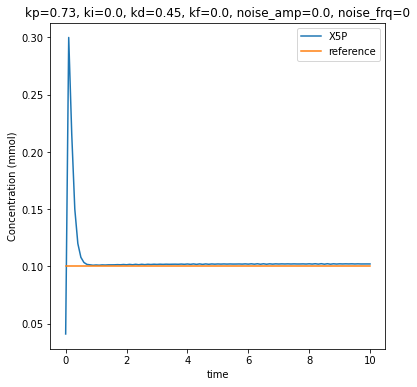

array([-18.52298338+0.j,  -8.95300873+0.j,  -8.95300592+0.j,
        -4.04420886+0.j,  -3.91935672+0.j,  -3.36367383+0.j,
        -1.42540094+0.j,  -1.4251411 +0.j,  -0.93303667+0.j,
        -0.87542422+0.j,  -0.4583059 +0.j,  -0.45830498+0.j,
        -0.07986327+0.j,  -0.07986328+0.j])

In [22]:
# Smaller derivative control
kp = .73
ki = .00000
kd = .45
cl_opts=dict(kp = kp, ki = ki, kd = kd, kf=.00, noise_amp=.0, noise_frq=0)
sim_opts = dict(end_time=10)
ts = evaluateClosedLoopSystem(ctlsb, cl_opts=cl_opts, sim_opts=sim_opts, 
                              is_plot=True)
poles = checkTFpoles(ctlsb, kp,ki,kd)
poles

**Discussion** 

**Here, the PD controller turned out to be the best option, since integral control caused windup and oscillations. The system settled well before 5 seconds, and stayed below the .350 mmol overshoot limit while also being free from oscillations. More tweaking could be done, but this result was sufficient for moving forward.**

**COMMENTS**
* Your analysis was excellent. But you should NEVER submit code that doesn't run.

# 4. Evaluate the Design

**Evaluate your design. (25 pt) You will construct a simulation testbed in which the SBML model is regulated by your control architecture. You should evaluate the effects of noise.**

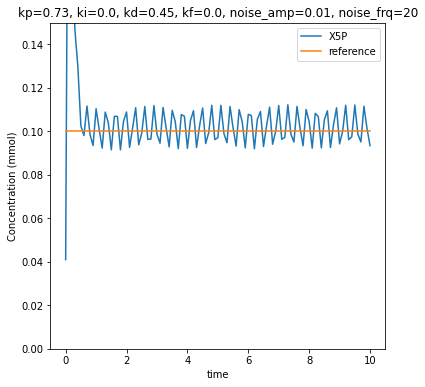

In [23]:
# Addition of noise
kp = .73
ki = .00000
kd = .45
cl_opts=dict(kp = kp, ki = ki, kd = kd, kf=.00, noise_amp=.01, noise_frq=20)
sim_opts = dict(end_time=10)
ts = evaluateClosedLoopSystem(ctlsb, cl_opts=cl_opts, plt_opts={"ylim": [0, .15]}, sim_opts=sim_opts, 
                              is_plot=True)

**The addition of noise to the system was a noticeable difference. So I explored the addition of filtering.**

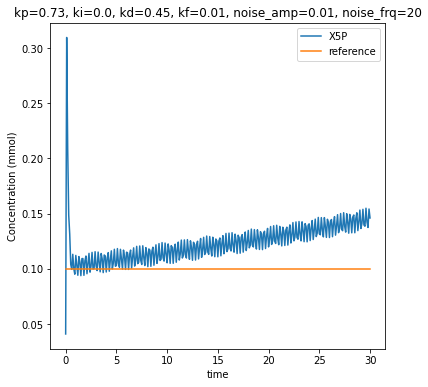

In [24]:
# Addition of filter
kp = .73
ki = .00000
kd = .45
cl_opts=dict(kp = kp, ki = ki, kd = kd, kf=.01, noise_amp=.01, noise_frq=20)
sim_opts = dict(end_time=30)
ts = evaluateClosedLoopSystem(ctlsb, cl_opts=cl_opts, sim_opts=sim_opts, 
                              is_plot=True)

**This filter value caused instability over time (looking over a time period of 30 seconds). So attempted decreasing kf.** 

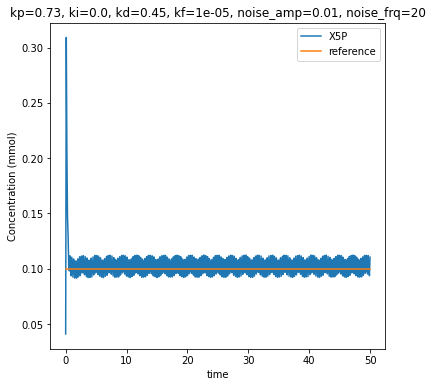

array([-18.52298338+0.j,  -8.95300873+0.j,  -8.95300592+0.j,
        -4.04420886+0.j,  -3.91935672+0.j,  -3.36367383+0.j,
        -1.42540094+0.j,  -1.4251411 +0.j,  -0.93303667+0.j,
        -0.87542422+0.j,  -0.4583059 +0.j,  -0.45830498+0.j,
        -0.07986327+0.j,  -0.07986328+0.j])

In [25]:
# Tuning of filter kf parameter
kp = .73
ki = .0000
kd = .45
cl_opts=dict(kp = kp, ki = ki, kd = kd, kf=.00001, noise_amp=.01, noise_frq=20)
sim_opts = dict(end_time=50)
ts = evaluateClosedLoopSystem(ctlsb, cl_opts=cl_opts, sim_opts=sim_opts, 
                              is_plot=True)
poles = checkTFpoles(ctlsb, kp,ki,kd)
poles

**Got stability back, but no effect on dampening the noise. Attempted integral control of oscillations:**

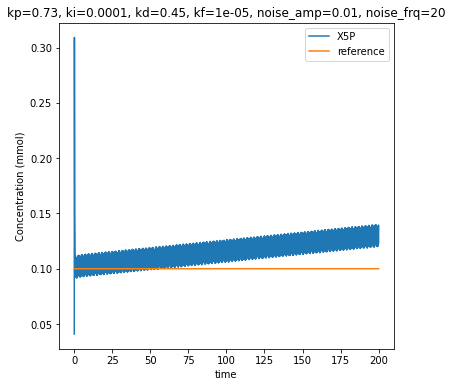

In [26]:
# Tuning of filter with integral control
kp = .73
ki = .0001
kd = .45
cl_opts=dict(kp = kp, ki = ki, kd = kd, kf=.00001, noise_amp=.01, noise_frq=20)
sim_opts = dict(end_time=200)
ts = evaluateClosedLoopSystem(ctlsb, cl_opts=cl_opts, sim_opts=sim_opts, 
                              is_plot=True)

**This resulted in a loss of stability again. At this point, it appeared both the filter and integral control parameters either caused instability or had no effect. For this model with PD control, noise could not be controlled very well. So I decreased noise amplitude, filter control, and integral control values.**

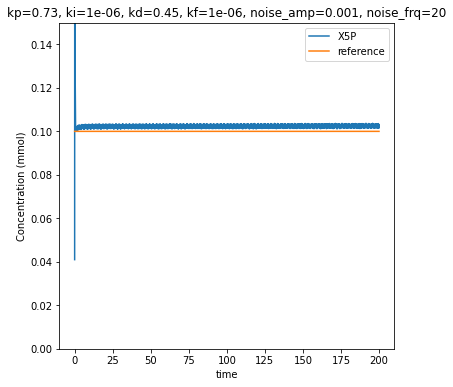

In [27]:
# System with low noise amplitude
kp = .73
ki = .000001
kd = .45
cl_opts=dict(kp = kp, ki = ki, kd = kd, kf=.000001, noise_amp=.001, noise_frq=20)
sim_opts = dict(end_time=200)
ts = evaluateClosedLoopSystem(ctlsb, cl_opts=cl_opts, plt_opts={"ylim": [0, .15]}, sim_opts=sim_opts, 
                              is_plot=True)

**Decreasing noise amplitude of course decreased noise, but my filter still had no effect. I made one last attempt to vary kf at values just before its instability point to see if there was a specific small parameter range I was missing.**

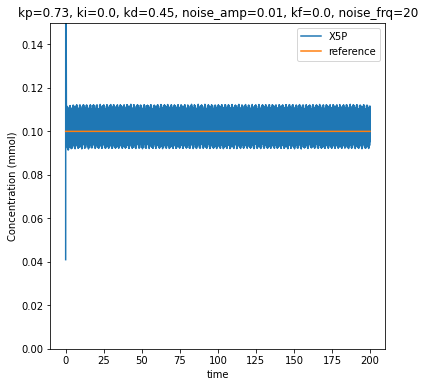

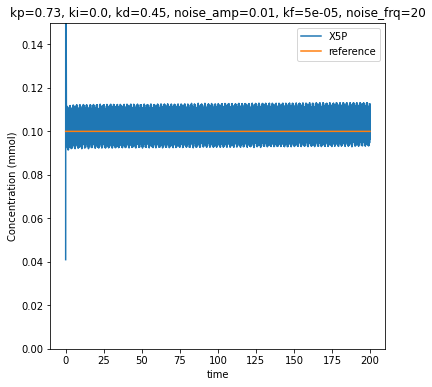

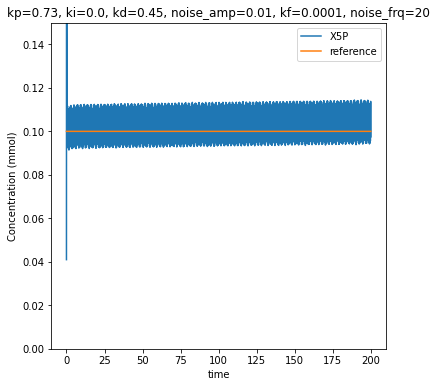

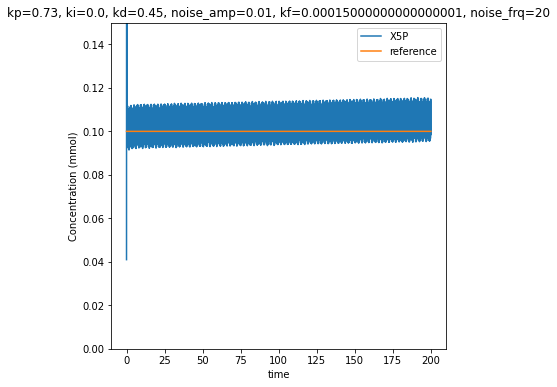

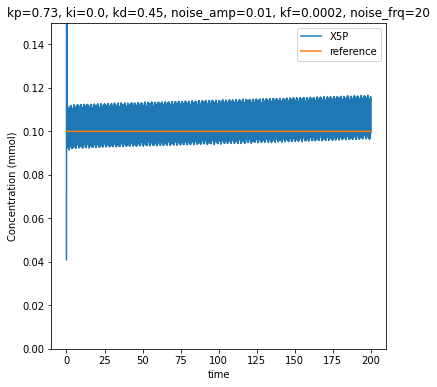

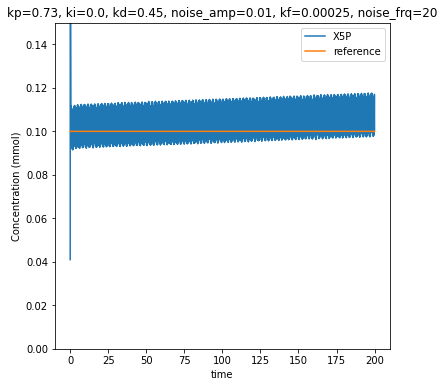

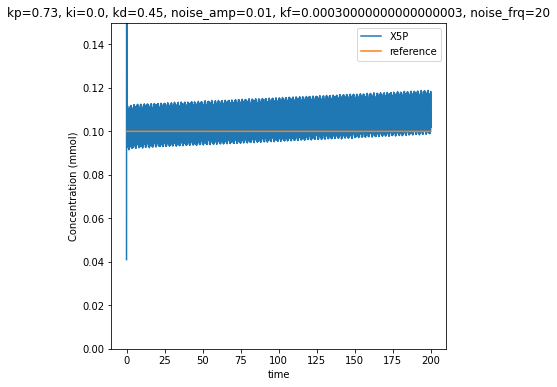

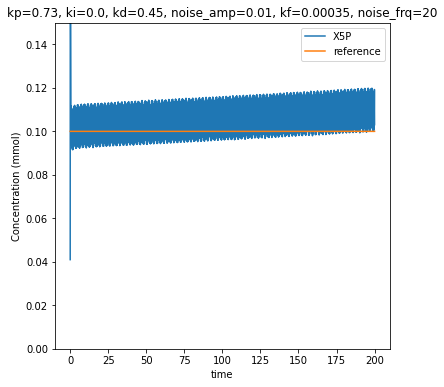

In [28]:
# Testing multiple kf values to show instability
kp = .73
ki = .0000
kd = .45
for kf in np.arange(0.0000, .0004, .00005):
  cl_opts = dict(kp=kp, ki=ki, kd=kd, noise_amp=0.01, kf=kf, noise_frq=20)
  sim_opts = dict(end_time=200)
  evaluateClosedLoopSystem(ctlsb, cl_opts=cl_opts, plt_opts={"ylim": [0, .15]}, sim_opts=sim_opts)

**Here, it becomes more apparent that the filter causes instability. Just to test that it wasn't a coding error, I attempted to build the testbed for the closed loop system again without the use of the evaluateClosedLoop function, but I got the same result of not being able to affect the noise with the filter.**  

In [29]:
# Elements of the system
ctlsb = ctl.ControlSBML(BIOMD, input_names=["Ru5P"], output_names=["X5P"])
factory = ctl.IOSystemFactory()
kp = .73
ki = .000001
kd = .45

# Create the elements of the feedback loop
noise = factory.makeSinusoid("noise", .01, 20)
system = ctlsb.makeNonlinearIOSystem("system")
controller = factory.makePIDController("controller", kp=kp, ki=ki, kd=kd)
fltr = factory.makeFilter("fltr", -.0001)
sum_Y_N = factory.makeAdder("sum_Y_N")
sum_R_F = factory.makeAdder("sum_R_F")

#Put together closed loop
closed_loop = control.interconnect(
  [ sum_Y_N, system, sum_R_F, fltr, neg_fltr, controller, noise ], 
  connections=[
    ['controller.in', 'sum_R_F.out'],    # e(t)
    ['system.Ru5P', 'controller.out'],
    ['sum_Y_N.in1', 'system.X5P'],        # y(t)
    ['sum_Y_N.in2', 'noise.out'],        # n(t)
    ['fltr.in',     'sum_Y_N.out'],
    ['sum_R_F.in1', 'fltr.out'],
    # ['neg_fltr.in', 'fltr.out'],
  ],
  inplist=["sum_R_F.in2"],
  outlist=["sum_R_F.in2", "sum_Y_N.out", 'system.Ru5P', 'system.X5P'],
)

# Simulation
X0 = ctl.makeStateVector(closed_loop)
TIMES = ctl.makeSimulationTimes(start_time=0, end_time=10, points_per_time=20)
result = control.input_output_response(closed_loop, T=TIMES, U=.1, X0=X0)
plt.plot(result.t, result.outputs[0].flatten())
plt.plot(result.t, result.outputs[1].flatten())
plt.plot(result.t, result.outputs[2].flatten())
plt.plot(result.t, result.outputs[3].flatten())
legends = ["reference input", "output", "Ru5P", "X5P"]
plt.xlabel("Time (seconds)")
plt.ylabel("Concentration (mmol)")
plt.legend(legends)


NameError: ignored

**Summary**

**In summary, I was able to make X5P stable around the operating point of .1 mmol using PD control.**


**To finish constructing the SBML model, I added noise to the system to evaluate how the closed loop system would respond both with and without the addition of a filter. Noise with an amplitude of .01 and frequency of 20 Hz showed a noticeable presence, however, the system still retained desirable settling time and overshoot characteristics.**


**To attempt dampening the noise, I increased the parameter for the filter, but this introduced instability in my system output. So I reduced the filter to a very small value just below the point of instability, but then this still showed no effect on the oscillations either.**


**I then attempted to use integral control to eliminate the noise, keeping the filter value small, but this had no effect either and lead to instability.**

**COMMENTS**
* Nicely done.

# 5. Discuss Trade-offs

**Discuss trade-offs. (10 pt) Discuss trade-offs in the selection of parameter values in your design. This should consider the impact of parameter values on the closed loop transfer functions.**




One tradeoff for this closed loop system design was my choice of input to control the system output. It would have been best to control glucose-6-phosphate since this species could actually be controlled in a laboratory setting. Glucose can be given to yeast through culture media, but the conversion species Ribulose-5-phosphate cannot be given so easily to yeast since it is created inside the cell. However, Glucose-6-phosphate was not a controllable species within this biomodel, and Ru5P was much easier to analyze. 

Even though Ru5P provided better control over X5P in this single input single output system, there were still tradeoffs with the chosen controller and parameter values. I chose to explore making a PID controller, but I soon found that the integral control component lead to system instability and introduced imaginary components to the system's transfer function poles, even when using very low values for ki. 

Proportional (kp) and derivative (kd) control were sufficient to bring the system to the .1 mmol operating point within 5 seconds and without overshooting past .3 mmol concentration. Both the kp and kd constants ended up being low values, so this controller did not require unrealistically high  parameter values to achieve the desired setpoint. This makes sense because the original DC gain of the closed loop transfer function ($H_{RY}$) was slightly greater than 1, so there was a small amount of amplification to the output that needed to be attenuated. The poles of $G(s)$ were also real and negative before the controller was implemented, so the system was stable to begin with. Integral control lead to imaginary poles in the resulting transfer function for $H_{RY}$, whereas PD control conserved the real poles. So integral control was left out. 


However, this resulted in a PD controller, not PID. I found this was significant after doing some more research. PD controllers act like high pass filters, so high frequency noise can pass into the system if there is no proper filter. We did not cover filters in depth, so I decided to show that the filter was incapable of dampening noise in this particular system. The closed loop system became unstable if the filtering constant kf was too high, but decreasing kf resultantly had no effect on noise oscillations. Usually, integral control provides low pass filtering, which could have assisted with dampening the high frequency noise, but here, ki made the system unstable, so I was not able to use it to dampen noise. So while PD control achieved the desired operating characteristics, the filter in this closed loop system could not attenuate noise. Perhaps either a full state feedback controller or a more appropriate high pass filter would have provided more adequate control over noise in this system. 

**COMMENTS**
* Nice analysis.
* You used LaTex. So you get the extra points!